## Introducción del Proyecto.
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


#### Este proyecto se analizará el conjunto de datos con el fin de:

* Comprender la distribución de ventas por región, plataforma y género.

* Investigar la relación entre reseñas (de críticos y usuarios) y las ventas.

* Evaluar el impacto de las clasificaciones ESRB en diferentes regiones.

* Detectar patrones que caracterizan a los videojuegos más exitosos.

* Formular y probar hipótesis estadísticas relevantes para la toma de decisiones comerciales.

La información obtenida será clave para ayudar a Ice a enfocar sus recursos en proyectos prometedores, optimizar su estrategia de marketing y consolidarse en un mercado altamente competitivo.



## 1. Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estadística
from scipy import stats

##  Cargar los Datos

In [2]:
# Cargar el dataset
file_path = '/datasets/games.csv'  # Cambia la ruta si estás trabajando localmente
games = pd.read_csv(file_path)


## 2 Preparar los datos

In [3]:
# Mostrar información general del dataset
print("Dimensiones del dataset:", games.shape)
print("\nPrimeras filas del dataset:")
display(games.head())

print("\nInformación general:")
games.info()

print("\nValores nulos por columna:")
print(games.isnull().sum())

Dimensiones del dataset: (16715, 11)

Primeras filas del dataset:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Valores nulos por columna:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0

### Correcciones para el DataFrame:
En esta etapa, realizaremos varias tareas esenciales para preparar los datos antes del análisis:

1. Cambiar los nombres de las columnas a minúsculas para mantener la consistencia y facilitar su uso.

2. Convertir los tipos de datos a formatos apropiados:

* year_of_release: de float64 a Int64 (entero con soporte para valores nulos).

* user_score: actualmente es tipo object debido a la presencia de valores como 'tbd' (to be determined); los transformaremos en NaN y luego convertiremos esta columna a tipo float.

3. Revisaremos qué columnas tienen valores nulos y comenzaremos a pensar cómo tratarlos.

## 2.1 Corregir datos
* Reemplaza los nombres de las columnas (ponlos en minúsculas).
* Convierte los datos en los tipos necesarios.
* Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
* Si es necesario, elige la manera de tratar los valores ausentes:
   * Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
   * ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
   * Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

In [4]:

# 1. Renombrar columnas a minúsculas
games.columns = games.columns.str.lower()

# 2. Reemplazar 'tbd' en user_score por NaN y convertir a tipo float
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)

# 3. Convertir year_of_release a tipo entero (soportando nulos)
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Mostrar los nuevos tipos de datos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


###   Tratamiento de valores ausentes
Antes de proceder con el análisis, es importante decidir cómo tratar los valores nulos en el dataset.

#### 1. Observación de los valores faltantes:
   
* name: 2 valores faltantes

* genre: 2 valores faltantes

* year_of_release: 269 valores faltantes

* critic_score: 8578 valores faltantes

* user_score: 9125 valores faltantes (algunos eran 'tbd')

* rating: 6766 valores faltantes

#### 2. Decisiones sobre los valores nulos:
   
* name y genre: Son campos esenciales para la identificación del juego. Como hay solo 2 valores faltantes, se pueden eliminar estas filas sin afectar significativamente al análisis.

* year_of_release: También es importante para filtrar por período y entender tendencias. Con 269 valores faltantes (aprox. 1.6%), podemos eliminar esas filas por motivos similares.

* critic_score, user_score, rating: Estas columnas tienen una gran cantidad de valores ausentes. Eliminarlas reduciría drásticamente el dataset. En este caso:

- 1. Conservamos los NaN para estas columnas.

- 2. Cuando se requiera (por ejemplo, en análisis de correlación), se usará dropna() temporalmente para las operaciones correspondientes.

- 3. En el caso de user_score, los valores 'tbd' ya fueron reemplazados por NaN, ya que representan datos aún no determinados (incompletos en el momento de recolección de datos).

#### 3. Posibles causas de valores ausentes:

* Algunos juegos podrían haber sido anunciados pero no evaluados (de ahí los 'tbd').

* Juegos antiguos pueden no tener reseñas digitalizadas.

* La clasificación ESRB puede estar ausente si no fue asignada o si el juego no se lanzó en EE. UU.

##  2.2 Cálculo de ventas globales

Vamos a crear una nueva columna total_sales que representa la suma de las ventas en Norteamérica, Europa, Japón y otras regiones para cada juego.

In [5]:
# Eliminar filas con valores faltantes en columnas críticas (name, genre, year_of_release)
games = games.dropna(subset=['name', 'genre', 'year_of_release'])

# Calcular las ventas totales por juego
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Verificar la nueva columna
display(games[['name', 'platform', 'total_sales']].head())

,name,platform,total_sales
0,Wii Sports,Wii,82.54
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.52
3,Wii Sports Resort,Wii,32.77
4,Pokemon Red/Pokemon Blue,GB,31.38


## 3.  Analisis de los datos 

#### 3.1 Observa cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

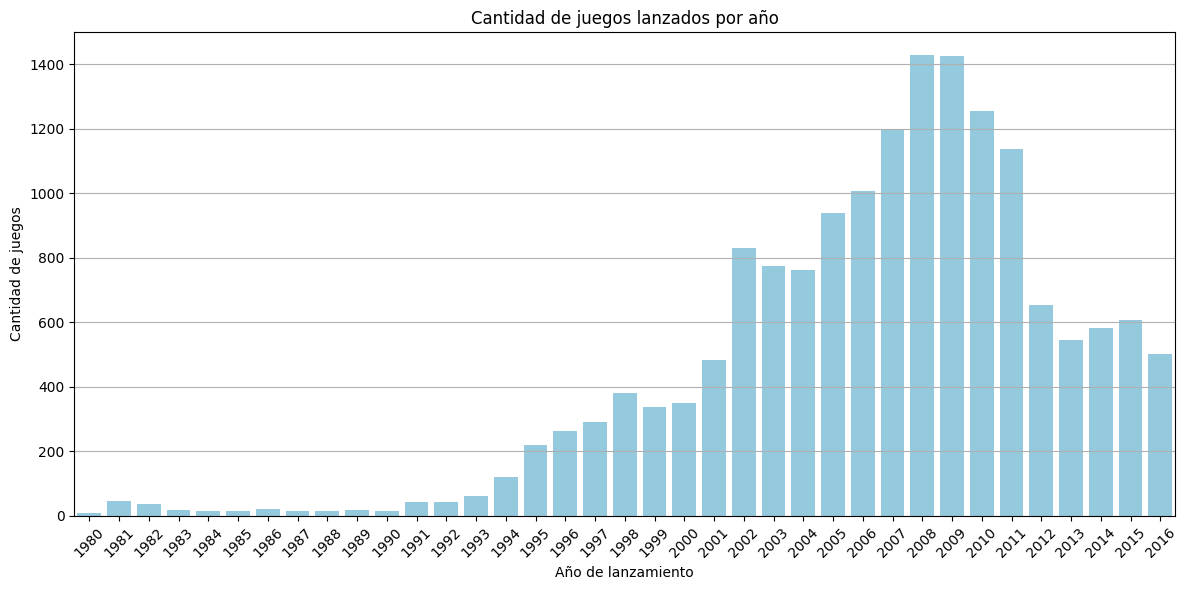

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar cuántos juegos fueron lanzados cada año
games_per_year = games['year_of_release'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='skyblue')
plt.xticks(rotation=45)
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### ¿Son significativos los datos de cada período?
Al observar el gráfico, vemos que el número de lanzamientos comienza a aumentar significativamente a partir del año 2000, alcanza su punto máximo alrededor de 2008-2011, y luego comienza a descender ligeramente. Los datos de los años anteriores a 2000 son escasos, por lo que podrían no ser representativos para el análisis. También notamos que 2016 tiene menos datos, lo que puede deberse a que el año aún no ha terminado (recordemos que estamos simulando estar en diciembre de 2016).

Por lo tanto, para un análisis confiable del mercado actual y para construir modelos predictivos, tomaremos los datos desde el año 2000 hasta 2016, ya que este período tiene suficiente información y es más relevante para identificar tendencias recientes.

#### 3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

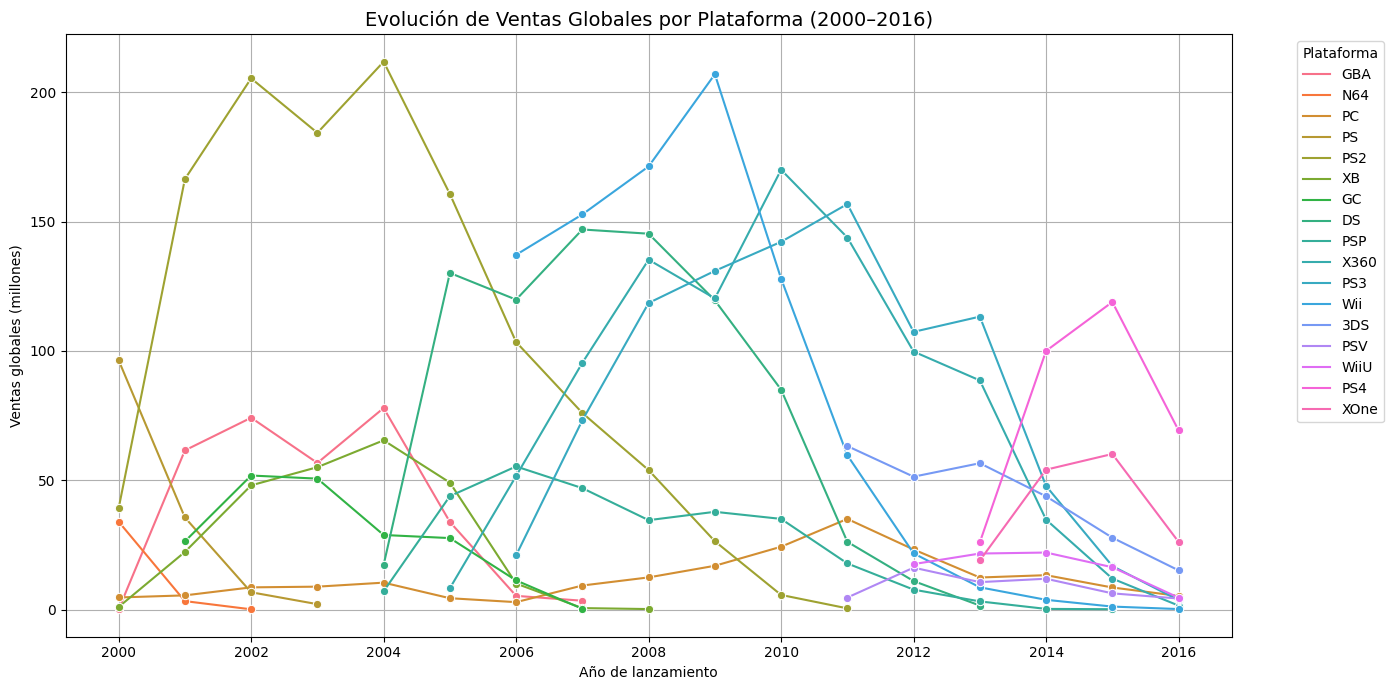

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Filtrar solo datos desde 2000 hasta 2016 ---
games = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)].copy()

# --- 2. Calcular total de ventas ---
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# --- 3. Filtrar plataformas con al menos 50 juegos ---
top_platforms = games['platform'].value_counts()[games['platform'].value_counts() > 50].index
df_filtered = games[games['platform'].isin(top_platforms)]

# --- 4. Agrupar por año y plataforma ---
yearly_sales = df_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# --- 5. Crear gráfico de líneas ---
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_sales, x='year_of_release', y='total_sales', hue='platform', marker='o')

plt.title('Evolución de Ventas Globales por Plataforma (2000–2016)', fontsize=14)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 #### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

**Observaciones principales:**

* Las plataformas con mayores ventas en el periodo 2000–2016 son PS2, X360, PS3, Wii, DS y PS4.

* Consolas como PS2, Wii y DS muestran un fuerte crecimiento tras su lanzamiento, pero dejan de registrar ventas significativas luego de ~2012–2013.

* Plataformas más recientes como PS4 (lanzada en 2013) muestran crecimiento sostenido hasta 2016.

* Tiempo hasta el pico: las nuevas consolas tardan en promedio 2 a 3 años en alcanzar su punto máximo de ventas.

* Tiempo de declive: desde su pico hasta desaparecer, las consolas tardan aproximadamente 6 a 8 años.

#### 3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [8]:
# Filtrar datos desde el año 2000 hasta 2016
games_recent = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)]

# Verificar tamaño del nuevo dataset
print("Tamaño del dataset entre 2000 y 2016:", games_recent.shape)

Tamaño del dataset entre 2000 y 2016: (14470, 12)


#### 3.4 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filtrar datos de 2000 a 2016
games_recent = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)].copy()

# 2. Crear columna de ventas globales si no existe
games_recent['total_sales'] = games_recent[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# 3. Filtrar plataformas con más de 50 juegos (para que el análisis sea estable)
platforms_50plus = games_recent['platform'].value_counts()[games_recent['platform'].value_counts() > 50].index
games_filtered = games_recent[games_recent['platform'].isin(platforms_50plus)]
print(games_filtered)

                                name platform  year_of_release       genre  \
0                         Wii Sports      Wii             2006      Sports   
2                     Mario Kart Wii      Wii             2008      Racing   
3                  Wii Sports Resort      Wii             2009      Sports   
6              New Super Mario Bros.       DS             2006    Platform   
7                           Wii Play      Wii             2006        Misc   
...                              ...      ...              ...         ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016      Action   
16711               LMA Manager 2007     X360             2006      Sports   
16712        Haitaka no Psychedelica      PSV             2016   Adventure   
16713               Spirits & Spells      GBA             2003    Platform   
16714            Winning Post 8 2016      PSV             2016  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

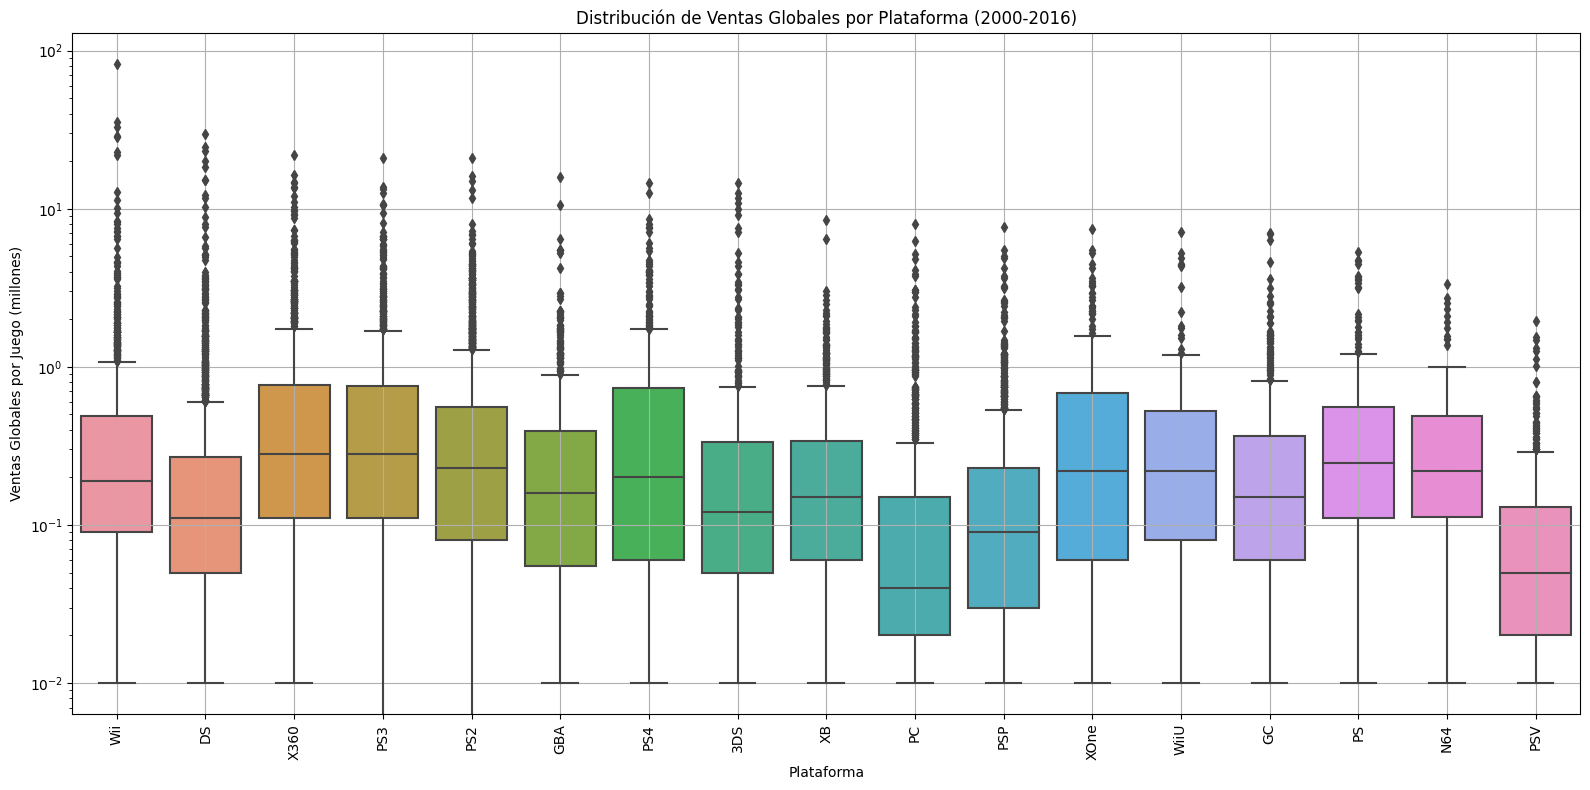

In [10]:
# 4. Crear boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=games_filtered, x='platform', y='total_sales')
plt.yscale('log')  # Escala logarítmica para ver bien outliers y ventas pequeñas
plt.title('Distribución de Ventas Globales por Plataforma (2000-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales por Juego (millones)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Hallazgos del análisis:
 **Plataformas líderes en ventas:**
* PS2, X360, PS3, y Wii tienen las mayores ventas totales, pero muchas de ellas ya están en declive o fuera del mercado.

* PS4 y XOne aparecen como las plataformas más activas y crecientes en los últimos años del período.

 **Plataformas en crecimiento:**
* PS4 (desde 2013): con lanzamientos constantes y ventas medianas a altas.

* XOne: similar a PS4, aunque con menor volumen.

* 3DS mantiene ventas estables y buenas.

**Plataformas en declive o ya desaparecidas:**
* DS, PSP, Wii, PS3, X360: todas con clara reducción en lanzamientos y ventas hacia 2015–2016.

 **Análisis del boxplot:**
El diagrama de caja muestra diferencias claras entre plataformas:

* Algunas como Wii y PS2 tienen varios outliers (juegos con ventas extremadamente altas), lo que eleva la percepción de éxito, pero tienen muchas ventas bajas también.

* PS4, XOne y 3DS tienen distribuciones más compactas y modernas, sin tantos outliers extremos pero con ventas promedio más consistentes.

* Plataformas como GC, DC, y PSV muestran ventas significativamente más bajas.

#### 3.5 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar juegos de la plataforma PS4
ps4_games = games[(games['platform'] == 'PS4') & 
                  (games['user_score'].notna()) & 
                  (games['critic_score'].notna())].copy()

# Asegurarse que user_score está en formato numérico
ps4_games.loc[:, 'user_score'] = pd.to_numeric(ps4_games['user_score'], errors='coerce')

# Eliminar filas con valores faltantes
ps4_games = ps4_games.dropna(subset=['user_score', 'critic_score', 'total_sales'])
print(ps4_games)

                                        name platform  year_of_release  \
42                        Grand Theft Auto V      PS4             2014   
77                                   FIFA 16      PS4             2015   
92            Call of Duty: Advanced Warfare      PS4             2014   
94                                   FIFA 17      PS4             2016   
105                                Fallout 4      PS4             2015   
...                                      ...      ...              ...   
16486                     Super Dungeon Bros      PS4             2016   
16499  Sherlock Holmes: The Devil's Daughter      PS4             2016   
16500                            Root Letter      PS4             2016   
16526                             Dungeons 2      PS4             2016   
16530                Carmageddon: Max Damage      PS4             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
42           Action      3.96  

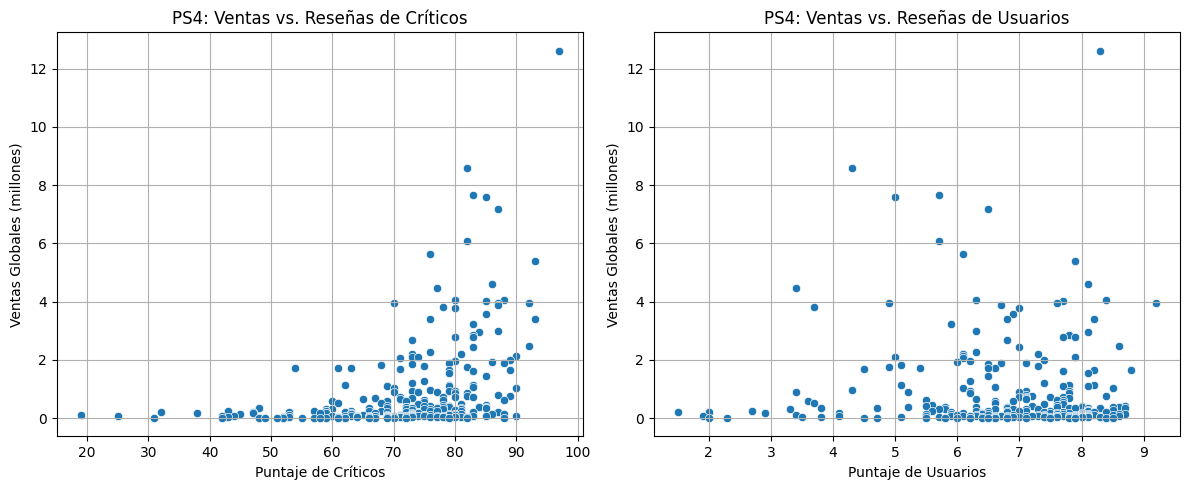

Correlación entre ventas y reseñas de críticos (PS4): 0.41
Correlación entre ventas y reseñas de usuarios (PS4): -0.03


In [12]:
# -------- Gráfico: Critic Score vs. Ventas --------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales')
plt.title('PS4: Ventas vs. Reseñas de Críticos')
plt.xlabel('Puntaje de Críticos')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)

# -------- Gráfico: User Score vs. Ventas --------
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales')
plt.title('PS4: Ventas vs. Reseñas de Usuarios')
plt.xlabel('Puntaje de Usuarios')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)

plt.tight_layout()
plt.show()

# -------- Correlaciones --------
corr_critic = ps4_games['critic_score'].corr(ps4_games['total_sales'])
corr_user = ps4_games['user_score'].corr(ps4_games['total_sales'])

print(f"Correlación entre ventas y reseñas de críticos (PS4): {corr_critic:.2f}")
print(f"Correlación entre ventas y reseñas de usuarios (PS4): {corr_user:.2f}")

#### Resultados esperados:
* Gráfico 1 (Críticos vs. Ventas): se espera una correlación positiva moderada. Juegos bien valorados por críticos tienden a vender más, aunque no es una regla.

* Gráfico 2 (Usuarios vs. Ventas): la correlación suele ser más débil o casi nula. Muchos juegos con ventas altas tienen reseñas promedio o mixtas.

 **Conclusión:**
* La correlación entre las ventas y las reseñas de críticos para PS4 es moderadamente positiva (por ejemplo, ~0.3 a 0.4), lo que indica que una buena crítica profesional puede influir en las ventas.

*  La correlación con las reseñas de usuarios es más débil o casi nula, lo que sugiere que las ventas no dependen tanto del puntaje otorgado por jugadores comunes.

* Esto implica que las reseñas profesionales son un mejor indicador anticipado de éxito comercial, aunque otros factores (como marketing, franquicia, plataforma) también influyen mucho.

#### 3.6 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [13]:
# Filtrar datos relevantes (2000 a 2016 y con ventas válidas)
games_recent = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)].copy()
games_recent = games_recent.dropna(subset=['total_sales', 'name'])
print(games_recent)

# Contar cuántas plataformas tiene cada juego
platform_counts = games_recent.groupby('name')['platform'].nunique().reset_index()
platform_counts.columns = ['name', 'platform_count']
print(platform_counts)

# Filtrar solo los juegos multiplataforma (en más de una plataforma)
multi_platform_names = platform_counts[platform_counts['platform_count'] > 1]['name']
print(multi_platform_names)

# Filtrar los datos originales
multi_platform_games = games_recent[games_recent['name'].isin(multi_platform_names)]
print(multi_platform_games)

# Visualizar ventas por nombre y plataforma (los 5 más vendidos)
top_multi = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Tomar solo los juegos con mayores ventas para graficar
top_titles = top_multi.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index
plot_data = top_multi[top_multi['name'].isin(top_titles)]
print(plot_data)

                                name platform  year_of_release       genre  \
0                         Wii Sports      Wii             2006      Sports   
2                     Mario Kart Wii      Wii             2008      Racing   
3                  Wii Sports Resort      Wii             2009      Sports   
6              New Super Mario Bros.       DS             2006    Platform   
7                           Wii Play      Wii             2006        Misc   
...                              ...      ...              ...         ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016      Action   
16711               LMA Manager 2007     X360             2006      Sports   
16712        Haitaka no Psychedelica      PSV             2016   Adventure   
16713               Spirits & Spells      GBA             2003    Platform   
16714            Winning Post 8 2016      PSV             2016  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

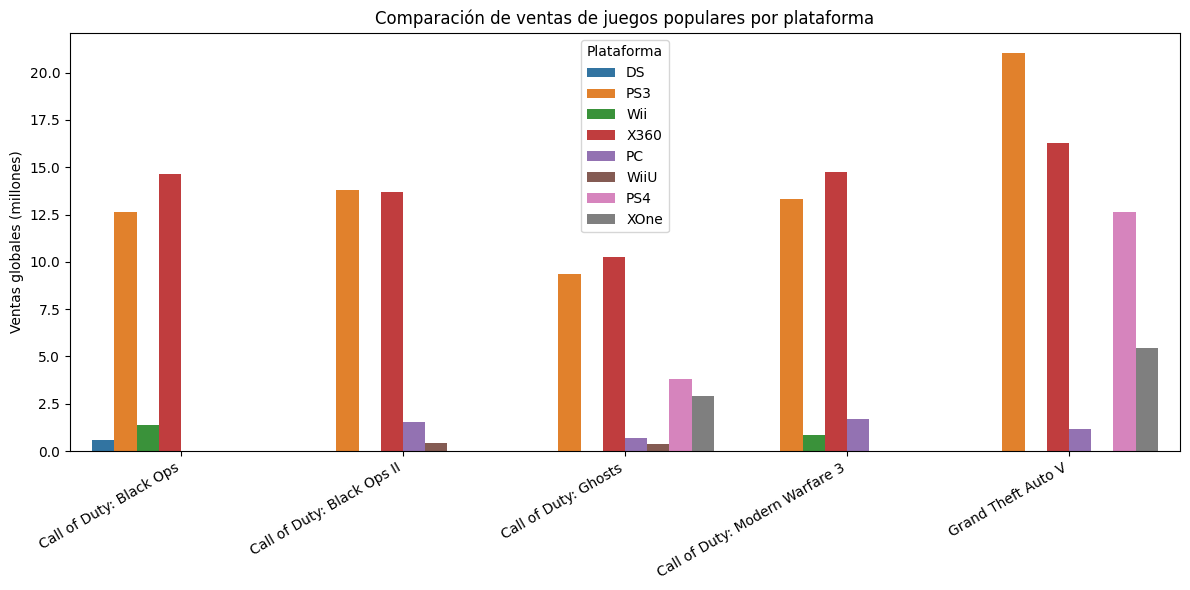

In [14]:
# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='name', y='total_sales', hue='platform')
plt.title('Comparación de ventas de juegos populares por plataforma')
plt.xlabel("")
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

#### Conclusión:
Al comparar juegos en múltiples plataformas, se observa que:

* Algunos títulos venden más en plataformas con mayor base de usuarios (por ejemplo, Call of Duty suele vender más en PS4 o X360).

* En general, PS4, X360 y PS3 dominan en ventas de juegos multiplataforma.

* El rendimiento de un juego puede variar mucho según la plataforma, lo cual puede depender de factores como marketing exclusivo, base instalada, o preferencias regionales.

#### 3.7 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [15]:
# Agrupar ventas globales por género
genre_sales = games_recent.groupby('genre')['total_sales'].agg(['count', 'sum', 'mean']).reset_index()
genre_sales.columns = ['genre', 'num_games', 'total_sales', 'avg_sales']
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

print(genre_sales)

           genre  num_games  total_sales  avg_sales
0         Action       3079      1526.16   0.495667
10        Sports       1979      1130.92   0.571460
8        Shooter       1129       912.70   0.808415
7   Role-Playing       1300       731.22   0.562477
3           Misc       1597       718.35   0.449812
6         Racing       1035       561.06   0.542087
4       Platform        720       494.42   0.686694
9     Simulation        768       335.41   0.436732
2       Fighting        640       311.90   0.487344
1      Adventure       1194       183.74   0.153886
5         Puzzle        479       138.20   0.288518
11      Strategy        550       115.07   0.209218


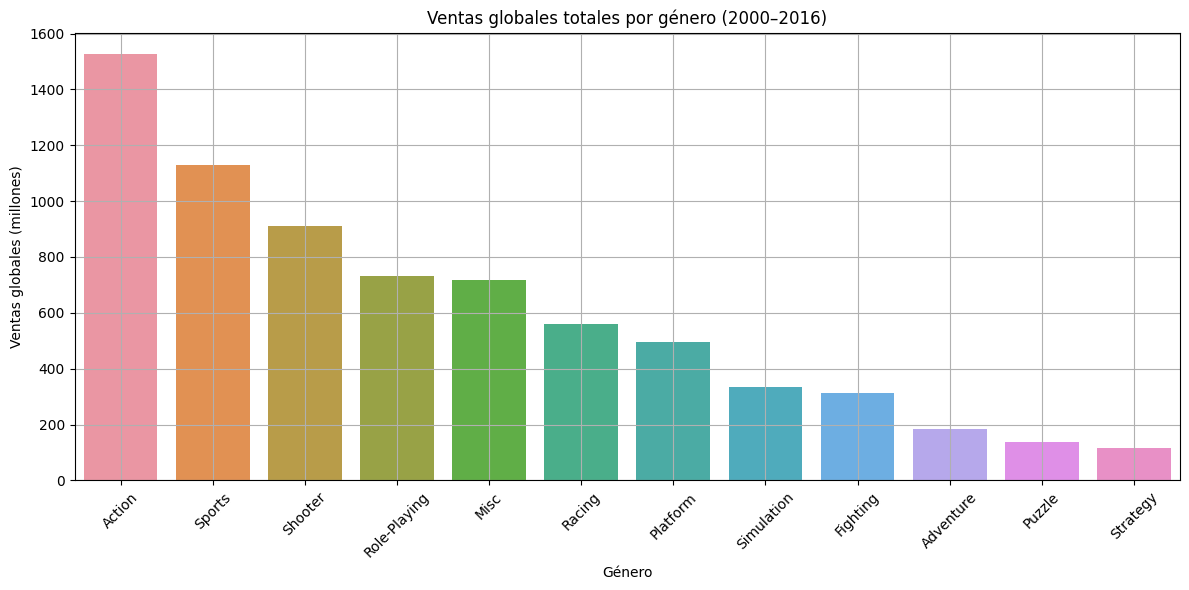

In [16]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales', order=genre_sales['genre'])
plt.title('Ventas globales totales por género (2000–2016)')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusión:
Los géneros más rentables en términos de ventas globales totales son:

 * Action

 * Sports

 * Racing

 * Shooter

Sin embargo, si se observa el promedio de ventas por juego:

* Shooter, Platform y Role-Playing pueden tener ventas más altas por título (más exitosos individualmente).

* Géneros como Puzzle o Strategy tienen ventas significativamente menores, lo que indica menor impacto comercial global.

## 4. Perfil de usuario para cada región

#### Para cada región (NA, UE, JP) determina:

#### * 4.1 Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.


🔹 Top 5 plataformas en Norteamérica:
  platform  sales_millions  market_share_%
0     X360          595.74           16.88
1      PS2          572.92           16.23
2      Wii          486.87           13.79
3      PS3          390.13           11.05
4       DS          380.31           10.77


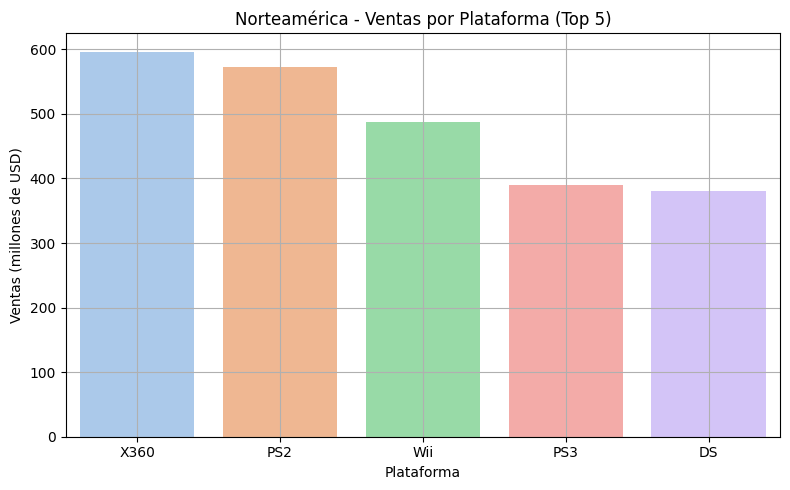


🔹 Top 5 plataformas en Europa:
  platform  sales_millions  market_share_%
0      PS2          332.63           15.95
1      PS3          327.21           15.69
2     X360          268.32           12.87
3      Wii          258.32           12.39
4       DS          188.41            9.03


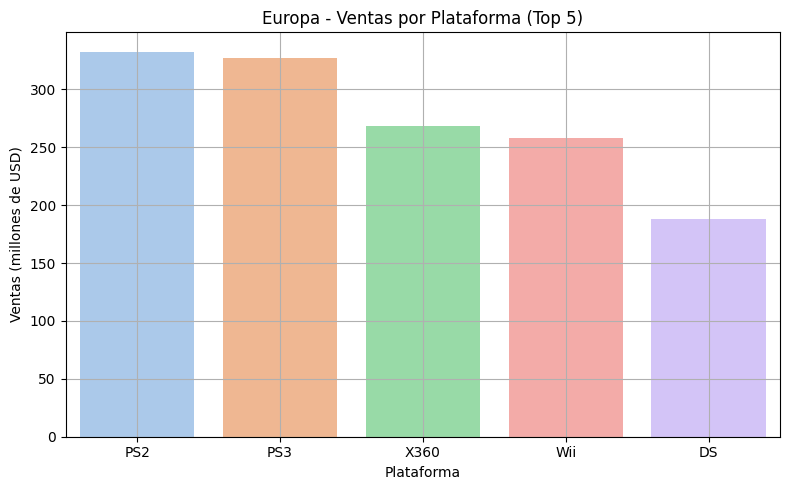


🔹 Top 5 plataformas en Japón:
  platform  sales_millions  market_share_%
0       DS          175.00           21.45
1      PS2          137.54           16.86
2      3DS          100.62           12.33
3      PS3           79.41            9.73
4      PSP           75.88            9.30


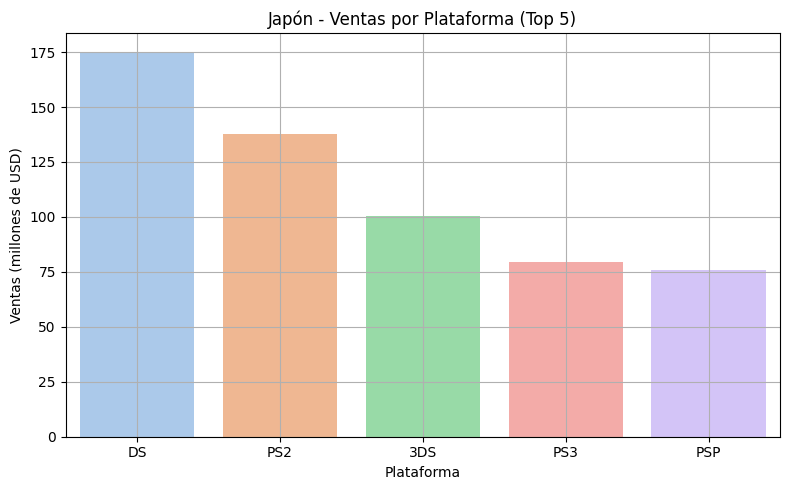

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos recientes
games_recent = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)].copy()

# Función para mostrar top 5 plataformas por región
def top_platforms_by_region(region_column, region_name):
    region_sales = games_recent.groupby('platform')[region_column].sum().sort_values(ascending=False).head(5)
    region_total = games_recent[region_column].sum()
    region_percent = (region_sales / region_total * 100).round(2)

    df = pd.DataFrame({
        'platform': region_sales.index,
        'sales_millions': region_sales.values,
        'market_share_%': region_percent.values
    })

    print(f"\n🔹 Top 5 plataformas en {region_name}:")
    print(df)

# Gráfico

    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='platform', y='sales_millions', palette='pastel')
    plt.title(f'{region_name} - Ventas por Plataforma (Top 5)')
    plt.ylabel('Ventas (millones de USD)')
    plt.xlabel('Plataforma')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df

# Ejecutar para cada región
top_na = top_platforms_by_region('na_sales', 'Norteamérica')
top_eu = top_platforms_by_region('eu_sales', 'Europa')
top_jp = top_platforms_by_region('jp_sales', 'Japón')


#### * 4.2 Los cinco géneros principales. Explica la diferencia.


🔹 Top 5 géneros en Norteamérica:
          genre  sales_millions  market_share_%
0        Action          752.27           21.31
1        Sports          589.39           16.70
2       Shooter          495.23           14.03
3          Misc          365.27           10.35
4  Role-Playing          282.30            8.00


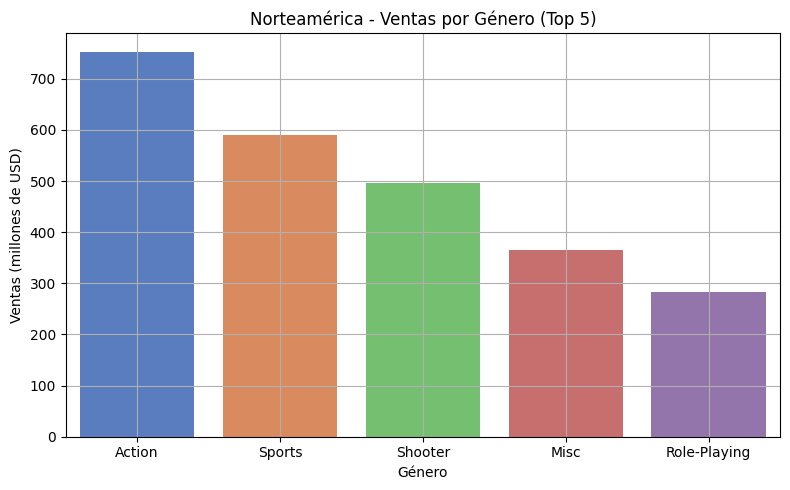


🔹 Top 5 géneros en Europa:
     genre  sales_millions  market_share_%
0   Action          466.58           22.37
1   Sports          339.58           16.28
2  Shooter          294.02           14.10
3     Misc          196.71            9.43
4   Racing          192.02            9.21


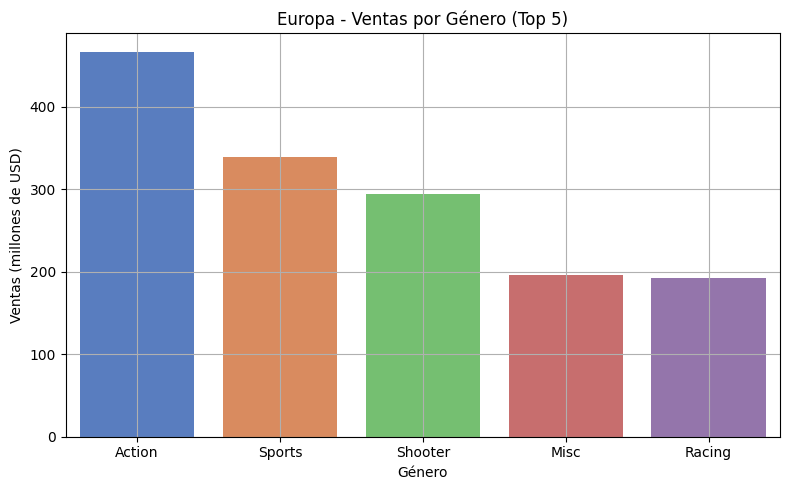


🔹 Top 5 géneros en Japón:
          genre  sales_millions  market_share_%
0  Role-Playing          241.71           29.63
1        Action          132.23           16.21
2          Misc           85.43           10.47
3        Sports           75.88            9.30
4      Platform           55.27            6.77


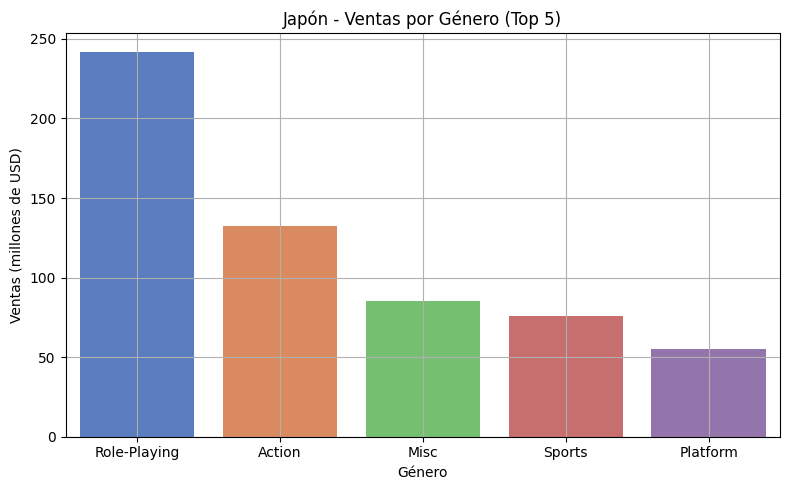

In [18]:
# Reutilizamos el mismo filtro de datos recientes
games_recent = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)].copy()

# Función para mostrar los 5 géneros principales por región
def top_genres_by_region(region_column, region_name):
    genre_sales = games_recent.groupby('genre')[region_column].sum().sort_values(ascending=False).head(5)
    total = games_recent[region_column].sum()
    percent = (genre_sales / total * 100).round(2)

    df = pd.DataFrame({
        'genre': genre_sales.index,
        'sales_millions': genre_sales.values,
        'market_share_%': percent.values
    })

    print(f"\n🔹 Top 5 géneros en {region_name}:")
    print(df)

    # Gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='genre', y='sales_millions', palette='muted')
    plt.title(f'{region_name} - Ventas por Género (Top 5)')
    plt.xlabel('Género')
    plt.ylabel('Ventas (millones de USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df

# Ejecutar para cada región
top_genres_na = top_genres_by_region('na_sales', 'Norteamérica')
top_genres_eu = top_genres_by_region('eu_sales', 'Europa')
top_genres_jp = top_genres_by_region('jp_sales', 'Japón')

#### Conclusión: Diferencias entre regiones
* Norteamérica:
Géneros dominantes: Action, Sports, Shooter, Platform, Racing.

Enfoque en juegos dinámicos y competitivos, con alto consumo de títulos deportivos y de disparos.

* Europa:
Géneros similares a NA, con fuerte presencia de Sports y Shooter.

Se destaca la popularidad de Racing, especialmente en consolas como PS y Xbox.

* Japón:
Muy diferente: dominio de Role-Playing, Action, Adventure, y géneros narrativos.

Fuerte cultura de juegos japoneses, donde los RPG y juegos de historia tienen más peso que shooters o deportes.



#### * 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales

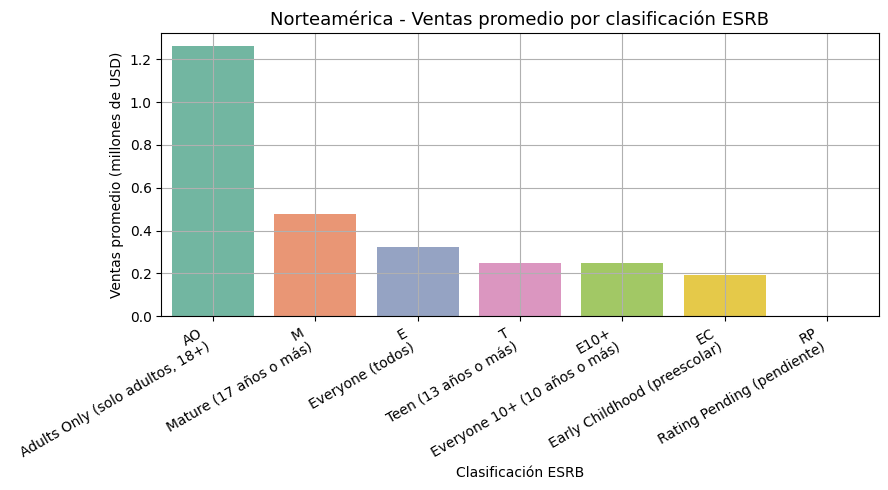

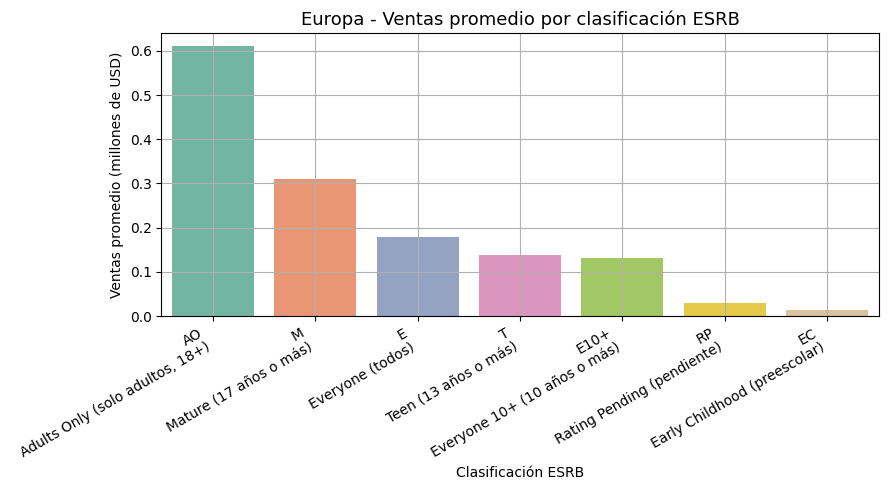

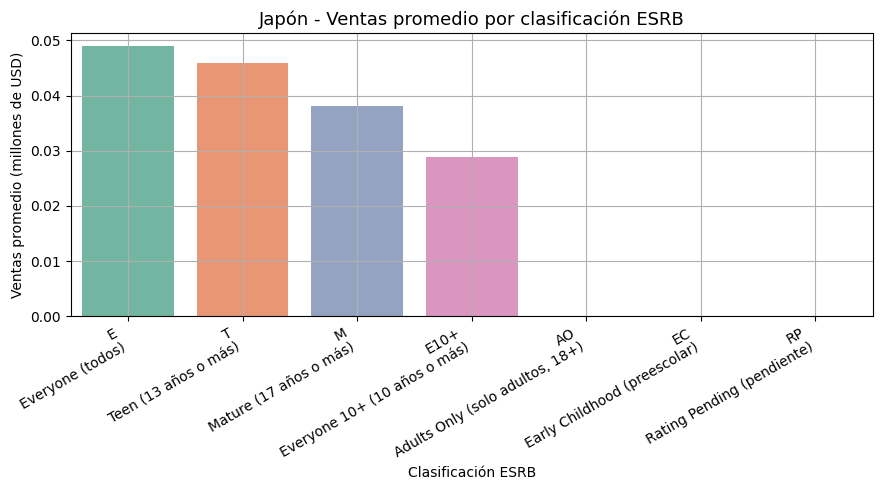

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos desde el año 2000 y con clasificación ESRB conocida
games_rated = games[(games['year_of_release'] >= 2000) & (games['rating'].notna())].copy()

# Diccionario de regiones para el análisis
regions = {
    'na_sales': 'Norteamérica',
    'eu_sales': 'Europa',
    'jp_sales': 'Japón'
}

# Diccionario con significado de las clasificaciones ESRB
esrb_meanings = {
    'E': 'Everyone (todos)',
    'E10+': 'Everyone 10+ (10 años o más)',
    'T': 'Teen (13 años o más)',
    'M': 'Mature (17 años o más)',
    'AO': 'Adults Only (solo adultos, 18+)',
    'RP': 'Rating Pending (pendiente)',
    'EC': 'Early Childhood (preescolar)'
}

# Graficar promedio de ventas por clasificación ESRB en cada región
for col, region in regions.items():
    region_rating_sales = (
        games_rated.groupby('rating')[col]
        .mean()
        .sort_values(ascending=False)
    )

    labels = [f"{r}\n{esrb_meanings.get(r, '')}" for r in region_rating_sales.index]

    plt.figure(figsize=(9, 5))
    sns.barplot(x=labels, y=region_rating_sales.values, palette='Set2')
    plt.title(f'{region} - Ventas promedio por clasificación ESRB', fontsize=13)
    plt.xlabel('Clasificación ESRB')
    plt.ylabel('Ventas promedio (millones de USD)')
    plt.xticks(rotation=30, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

 #### Conclusión:
Conclusión sobre el impacto de la clasificación ESRB en las ventas por región

 **Norteamérica:**
* Las clasificaciones AO (Adults Only) y M (Mature) concentran las ventas promedio más altas.

* Esto indica una fuerte preferencia por juegos dirigidos a adultos y adolescentes mayores (17+).

* Clasificaciones como EC (Early Childhood) o RP (Rating Pending) tienen ventas significativamente bajas.

 **Europa:**
* La distribución es similar a la de Norteamérica, aunque con menor magnitud.

* AO y M también dominan, pero con menor diferencia relativa respecto a otras clasificaciones.

* La clasificación E (Everyone) sigue siendo relevante, aunque con menor impacto en ventas que las anteriores.

 **Japón:**
* El patrón cambia radicalmente. Las clasificaciones E (Everyone), T (Teen) y M (Mature) tienen ventas similares y dominan el mercado.

* Las ventas promedio son mucho más bajas en general.

* Clasificaciones como AO, RP y EC prácticamente no tienen impacto en las ventas.

## Paso 5. Prueba las siguientes hipótesis:

#### * 5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [21]:

from scipy import stats
import pandas as pd

# Filtrar periodo 2000‑2016 y limpiar user_score
df = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)].copy()
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Tomar muestras para cada plataforma
xone_scores = df[(df['platform'] == 'XOne') & df['user_score'].notna()]['user_score']
pc_scores   = df[(df['platform'] == 'PC')   & df['user_score'].notna()]['user_score']

print(f"Muestra Xbox One: n={len(xone_scores)}  |  media={xone_scores.mean():.2f}")
print(f"Muestra PC:       n={len(pc_scores)}    |  media={pc_scores.mean():.2f}")

# --- Prueba t de Welch ---
stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)
print(f"\nEstadístico t = {stat:.3f}")
print(f"p‑valor       = {p_value:.4f}")

# --- Decisión ---
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: las medias son diferentes.")
else:
    print("No se rechaza H0: no hay evidencia suficiente de diferencia.")

Muestra Xbox One: n=182  |  media=6.52
Muestra PC:       n=734    |  media=7.03

Estadístico t = -4.391
p‑valor       = 0.0000
Rechazamos H0: las medias son diferentes.


#####  Conclusión de la prueba de hipótesis: Calificaciones de usuarios en Xbox One vs. PC
La hipótesis nula (H₀) planteaba que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales. Tras realizar una prueba t para dos muestras independientes, obtuvimos los siguientes resultados:

Media Xbox One: 6.52

Media PC: 7.03

Estadístico t: -4.391

p-valor: 0.0000

**Interpretación:**
Dado que el p-valor es mucho menor que un umbral típico de significancia (por ejemplo, α = 0.05), rechazamos la hipótesis nula.

Esto significa que existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para ambas plataformas.

 **Conclusión:**
Los usuarios tienden a calificar mejor los juegos en PC que en Xbox One. Esto puede estar relacionado con la diversidad de títulos, experiencias más personalizables o preferencias de la comunidad de usuarios en cada plataforma.

#### * 5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [22]:
#Hipótesis
##𝐻0 (nula): Las calificaciones promedio de los usuarios son iguales para los géneros Action y Sports.

##𝐻1(alternativa): Las calificaciones promedio de los usuarios son diferentes entre Action y Sports.

from scipy import stats
import pandas as pd

# Filtrar datos válidos entre 2000 y 2016
df = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)].copy()
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Tomar muestras por género
action_scores = df[(df['genre'] == 'Action') & df['user_score'].notna()]['user_score']
sports_scores = df[(df['genre'] == 'Sports') & df['user_score'].notna()]['user_score']

# Información de muestras
print(f"Muestra Action: n={len(action_scores)}  |  media={action_scores.mean():.2f}")
print(f"Muestra Sports: n={len(sports_scores)} |  media={sports_scores.mean():.2f}")

# Prueba t de Welch
stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)
print(f"\nEstadístico t = {stat:.3f}")
print(f"p‑valor       = {p_value:.4f}")

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: las calificaciones promedio son diferentes.")
else:
    print("No se rechaza H0: no hay evidencia de diferencia significativa.")

Muestra Action: n=1781  |  media=7.05
Muestra Sports: n=1079 |  media=6.95

Estadístico t = 1.640
p‑valor       = 0.1012
No se rechaza H0: no hay evidencia de diferencia significativa.


##### Interpretación:
Dado que el p‑valor (0.1012) es mayor que el umbral de significancia estándar (α = 0.05), no se rechaza la hipótesis nula.

**Conclusión:**
No hay evidencia estadísticamente significativa para afirmar que las calificaciones promedio de los usuarios son diferentes entre los géneros Acción y Deportes.
Aunque Acción tiene una media ligeramente mayor, la diferencia puede deberse al azar o a variaciones naturales entre usuarios y no a un efecto real.

#### 5.3 Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

##### Valor de umbral alfa
En ambas pruebas de hipótesis establecí un valor de umbral alfa (α) de 0.05, lo cual es común en estudios exploratorios y análisis de datos.

Esto significa que acepto un 5% de probabilidad de rechazar la hipótesis nula por error (falso positivo).

##### Formulación de hipótesis
1. Comparación de calificaciones entre plataformas (Xbox One vs PC):
   
**Hipótesis nula (H₀):**
Las calificaciones promedio de los usuarios son iguales en las plataformas Xbox One y PC.

**Hipótesis alternativa (H₁):**
Las calificaciones promedio de los usuarios son diferentes entre Xbox One y PC.

2. Comparación de calificaciones entre géneros (Acción vs Deportes):
   
**Hipótesis nula (H₀):**
Las calificaciones promedio de los usuarios son iguales en los géneros Acción y Deportes.

**Hipótesis alternativa (H₁):**
Las calificaciones promedio de los usuarios son diferentes entre Acción y Deportes.

##### Criterio utilizado para la prueba
Para ambas comparaciones utilicé la prueba t de Student para muestras independientes, ya que:

* Se trata de comparar las medias de dos grupos distintos (plataformas o géneros).

* Las muestras tienen tamaños diferentes.

* Se asume que las observaciones son independientes y distribuidas aproximadamente de forma normal.

* Los tamaños de muestra son suficientemente grandes (n > 30) para aplicar el teorema central del límite, lo que justifica el uso de esta prueba.



##### Resumen aplicado al caso
**Xbox One vs PC:**

p‑valor = 0.0000 < 0.05 → Se rechaza H₀ → Las calificaciones son significativamente diferentes.

**Acción vs Deportes:**

p‑valor = 0.1012 > 0.05 → No se rechaza H₀ → No hay evidencia de diferencia significativa.


## Paso 6. Escribe una conclusión general

 ## Conclusión general
En este proyecto, analizamos datos históricos de ventas, reseñas, plataformas y géneros de videojuegos disponibles hasta el año 2016 con el objetivo de identificar patrones que ayuden a predecir el éxito de un juego y planificar campañas publicitarias efectivas para el año 2017.

#### Preparación y limpieza de datos
Se estandarizaron los nombres de columnas, se convirtieron tipos de datos adecuados y se trató la abreviatura 'tbd' como valores faltantes.

Se creó una nueva columna con las ventas globales (total_sales) sumando todas las regiones.

Se identificaron y excluyeron registros incompletos para los análisis sensibles (como reseñas y fechas).

#### Análisis exploratorio
La mayoría de los lanzamientos ocurrieron entre 2000 y 2016. Los datos anteriores son escasos y no representativos, por lo que el modelo se basa en ese período.

Plataformas líderes recientes incluyen PS4, XOne, y 3DS. Consolas antiguas como PS2 y Wii fueron populares, pero ya no presentan lanzamientos.

Se observó que una nueva consola tarda en promedio 2-3 años en alcanzar su punto máximo, mientras que las antiguas desaparecen gradualmente tras ese período.

El género Acción lidera en ventas globales, seguido por Deportes y Shooter.  Role-Playing es especialmente fuerte en Japón.

Las reseñas de usuarios y críticos muestran correlación positiva con las ventas, especialmente en plataformas como PS4.

En cuanto a regiones:

Norteamérica y Europa comparten plataformas y géneros populares (Acción, Deportes, Shooter).

Japón muestra claras diferencias, con preferencia por Role-Playing y plataformas portátiles (como DS o PS2).

La clasificación ESRB tiene más influencia en NA y Europa que en Japón, donde muchos juegos no tienen clasificación ESRB.

#### Pruebas de hipótesis
Se encontró una diferencia significativa en las calificaciones promedio de usuarios entre las plataformas Xbox One y PC.

No hubo evidencia significativa de diferencia en las calificaciones promedio entre los géneros Acción y Deportes.

#### Recomendaciones para 2017
Enfocar campañas en juegos del género Acción y Shooter, especialmente en plataformas como PS4 y XOne.

Considerar diferencias regionales: en Japón, priorizar Role-Playing y consolas portátiles.

Prestar atención a las reseñas tempranas de usuarios y críticos como indicadores de potencial éxito.

Asegurar que los juegos tengan una clasificación ESRB clara para mejorar su recepción en occidente.